# Promethee I


In [87]:
import csv
import numpy as np
import pandas as pd
import networkx as nx

pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [3]:
header = []
ids = []
data = []
with open("data.csv", "r") as f:
    reader = csv.reader(f)
    header = next(reader)[1:]
    for row in reader:
        name = row[0]
        ids.append(name)
        data.append(list(map(float, row[1:])))
data = np.array(data)
ids = np.array(ids)

In [4]:
header

['CPU', 'RAM', 'Memory', 'Camera', 'Battery', 'Weight', 'Price']

In [5]:
pd.DataFrame(ids)

,0
0,iPhone 15 Pro Max
1,iPhone 15 Pro
2,iPhone 15
3,iPhone SE the 3rd
4,Samsung S24 Ultra
5,Samsung S24+
6,Samsung S24
7,Samsung S23 FE
8,Pixel 8 Pro
9,Pixel 8


In [6]:
pd.DataFrame(data)

,0,1,2,3,4,5,6
0,3.78,8.00,512.00,48.00,4422.00,221.00,1399.00
1,3.78,8.00,512.00,48.00,3274.00,187.00,1299.00
2,3.50,6.00,512.00,48.00,3349.00,171.00,1099.00
3,3.20,4.00,256.00,12.00,2018.00,144.00,579.00
4,3.39,12.00,256.00,200.00,5000.00,232.00,1660.00
5,3.20,12.00,256.00,50.00,4900.00,196.00,1300.00
6,3.20,8.00,256.00,50.00,4000.00,167.00,1030.00
7,2.80,8.00,256.00,50.00,4500.00,209.00,860.00
8,3.00,12.00,128.00,50.00,5050.00,213.00,749.00
9,3.00,8.00,128.00,50.00,4575.00,187.00,499.00


In [7]:
is_gain_criteria_list = [1] * 5 + [0] * 2
indifference_thresholds_q = [0.4, 2, 32, 10, 500, 20, 50]
preference_thresholds_p = [1, 4, 128, 20, 1000, 50, 200]
weights = [0.048, 0.048, 0.1, 0.15, 0.24, 0.15, 0.24]

In [8]:
marginal_preference_indices = np.empty((len(header),) + (len(ids),) * 2)

for c in range(len(header)):
    is_gain_criteria = is_gain_criteria_list[c]
    q = indifference_thresholds_q[c]
    p = preference_thresholds_p[c]
    marginal_preference_index = marginal_preference_indices[c]

    for a in range(len(ids)):
        for b in range(len(ids)):
            va = data[a][c]
            vb = data[b][c]

            d = va - vb if is_gain_criteria else vb - va

            marginal_preference_index[a, b] = (
                1 if d > p else (0 if d <= q else (d - q) / (p - q))
            )

In [9]:
# Weight
pd.DataFrame(marginal_preference_indices[-2])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.47,0.00,0.00,0.00,0.83,0.00,0.00,0.07,0.20,0.00,0.00,0.00,0.27,0.00,0.70
2,1.00,0.00,0.00,0.00,1.00,0.17,0.00,0.60,0.73,0.00,0.20,0.47,0.80,0.43,1.00
3,1.00,0.77,0.23,0.00,1.00,1.00,0.10,1.00,1.00,0.77,1.00,1.00,1.00,1.00,1.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.17,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40
6,1.00,0.00,0.00,0.00,1.00,0.30,0.00,0.73,0.87,0.00,0.33,0.60,0.93,0.57,1.00
7,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.47,0.00,0.00,0.00,0.83,0.00,0.00,0.07,0.20,0.00,0.00,0.00,0.27,0.00,0.70


In [10]:
weights_expanded = np.array(weights)[:, np.newaxis, np.newaxis]
weighted_matrices = marginal_preference_indices * weights_expanded
comprehensive_preference_index = np.sum(weighted_matrices, axis=0)

In [11]:
pd.DataFrame(comprehensive_preference_index)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.24,0.24,0.55,0.34,0.11,0.11,0.15,0.13,0.13,0.14,0.12,0.13,0.13,0.15
1,0.15,0.00,0.00,0.55,0.46,0.11,0.11,0.16,0.16,0.13,0.14,0.12,0.17,0.13,0.25
2,0.39,0.24,0.00,0.49,0.49,0.36,0.10,0.21,0.22,0.11,0.15,0.17,0.23,0.17,0.27
3,0.39,0.35,0.27,0.00,0.39,0.39,0.26,0.39,0.44,0.22,0.25,0.36,0.39,0.25,0.25
4,0.24,0.44,0.44,0.44,0.00,0.15,0.44,0.21,0.25,0.30,0.38,0.30,0.20,0.30,0.31
5,0.15,0.29,0.29,0.44,0.32,0.00,0.24,0.05,0.10,0.15,0.17,0.15,0.05,0.15,0.21
6,0.39,0.35,0.10,0.44,0.39,0.28,0.00,0.11,0.23,0.10,0.15,0.19,0.14,0.18,0.25
7,0.24,0.48,0.48,0.44,0.26,0.24,0.19,0.00,0.10,0.10,0.10,0.10,0.00,0.10,0.10
8,0.35,0.53,0.53,0.44,0.24,0.24,0.53,0.17,0.00,0.05,0.14,0.05,0.21,0.05,0.05
9,0.31,0.48,0.48,0.49,0.36,0.24,0.28,0.25,0.27,0.00,0.00,0.24,0.28,0.00,0.10


In [12]:
positive_flows = np.sum(comprehensive_preference_index, 1)
negative_flows = np.sum(comprehensive_preference_index, 0)

In [70]:
pd.DataFrame(
    np.stack(
        (
            ids[np.argsort(positive_flows)[::-1]],
            positive_flows[np.argsort(positive_flows)[::-1]].astype(np.float16),
            ids[np.argsort(negative_flows)],
            negative_flows[np.argsort(negative_flows)].astype(np.float16),
        ),
        1,
    ),
    columns=("Sorted by F+", "F+", "Sorted by F-", "F-"),
)

,Sorted by F+,F+,Sorted by F-,F-
0,Samsung Galaxy S22 Ultra,5.57,Pixel 8,1.768
1,iPhone SE the 3rd,4.605,Xiaomi 12 Pro,1.953
2,Pixel 7,4.418,Pixel 7,2.014
3,Samsung S24 Ultra,4.383,Samsung Galaxy S22 Ultra,2.365
4,Pixel 8,3.781,Oneplus 11 5G,2.738
5,iPhone 15,3.61,Samsung S23 FE,2.746
6,Pixel 8 Pro,3.564,Pixel 8 Pro,2.871
7,Xiaomi 12 Pro,3.44,Vivo X80 Pro,2.904
8,Samsung S24,3.309,Samsung S24+,3.488
9,Oneplus 11 5G,3.172,iPhone 15 Pro Max,4.05


In [83]:
preferred = []
indifferent = []
incomparable = []

for a in range(len(ids)):
    for b in range(len(ids)):
        if a == b:
            continue

        pa = positive_flows[a]
        na = negative_flows[a]

        pb = positive_flows[b]
        nb = negative_flows[b]

        if (pa > pb and na > nb) or (pa < pb and na < nb):
            incomparable.append((a, b))
        elif pa == pb and na == nb:
            indifferent.append((a, b))
        elif (pa > pb and na < nb) or (pa == pb and na < nb) or (pa > pb and na == nb):
            preferred.append((a, b))

In [84]:
len(preferred), len(indifferent), len(incomparable)

(61, 0, 88)

In [85]:
pd.DataFrame(preferred[:10])

,0,1
0,0,1
1,2,1
2,4,1
3,4,2
4,5,0
5,5,1
6,6,1
7,7,0
8,7,1
9,7,5


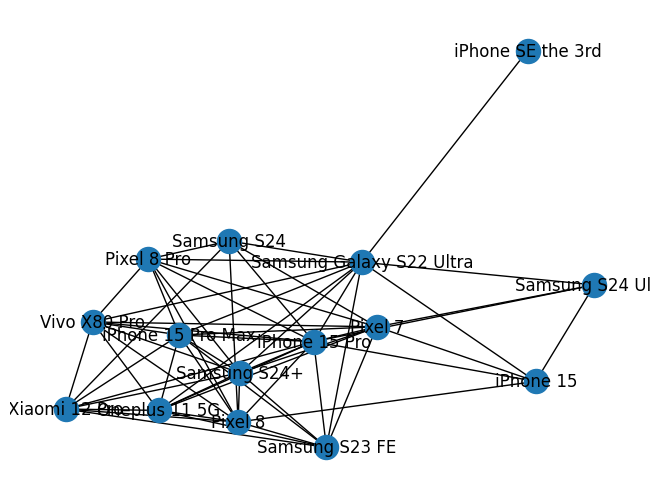

In [123]:
G = nx.Graph()
G.add_edges_from(ids[preferred])
nx.draw(G, with_labels=1)

# Promethee II


In [75]:
net_flows = positive_flows - negative_flows

In [81]:
pd.DataFrame(
    np.stack(
        (
            ids[np.argsort(positive_flows)[::-1]],
            positive_flows[np.argsort(positive_flows)[::-1]].astype(np.float16),
            ids[np.argsort(negative_flows)],
            negative_flows[np.argsort(negative_flows)].astype(np.float16),
            ids[np.argsort(net_flows)[::-1]],
            net_flows[np.argsort(net_flows)[::-1]].astype(np.float16),
        ),
        1,
    ),
    columns=(
        "Sorted by F+",
        "F+",
        "Sorted by F-",
        "F-",
        "Complete Ranking",
        "Net Flow",
    ),
)

,Sorted by F+,F+,Sorted by F-,F-,Complete Ranking,Net Flow
0,Samsung Galaxy S22 Ultra,5.57,Pixel 8,1.768,Samsung Galaxy S22 Ultra,3.207
1,iPhone SE the 3rd,4.605,Xiaomi 12 Pro,1.953,Pixel 7,2.402
2,Pixel 7,4.418,Pixel 7,2.014,Pixel 8,2.014
3,Samsung S24 Ultra,4.383,Samsung Galaxy S22 Ultra,2.365,Xiaomi 12 Pro,1.486
4,Pixel 8,3.781,Oneplus 11 5G,2.738,Pixel 8 Pro,0.6934
5,iPhone 15,3.61,Samsung S23 FE,2.746,Oneplus 11 5G,0.4338
6,Pixel 8 Pro,3.564,Pixel 8 Pro,2.871,Samsung S23 FE,0.1798
7,Xiaomi 12 Pro,3.44,Vivo X80 Pro,2.904,Vivo X80 Pro,0.036
8,Samsung S24,3.309,Samsung S24+,3.488,Samsung S24 Ultra,-0.2203
9,Oneplus 11 5G,3.172,iPhone 15 Pro Max,4.05,Samsung S24+,-0.7456
